In [65]:
# Some useful import

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.special import comb

#### Définition du modèle 1 et exemples

In [31]:
def random_graph(N, pa, pb, p):
    """
    Construit un graphe selon le modèle 1
    :param N: Taille d'une communauté (le graphe possède alors 2*N sommets)
    :param pa: Proba de connexion à l'intérieur de la communauté A
    :param pb: Proba de connexion à l'intérieur de la communauté B
    :param p: Proba de connexion inter communauté
    :return: Un graphe
    """
    nodes = np.array([i for i in range(2*N)])
    classes = np.array([1 for i in range(N)] + [-1 for i in range(N)])
    # np.random.shuffle(classes)

    edges_A = []
    edges_B = []
    edges_inter = []

    # Pour chaque sommet
    for i in range(2 * N):
        # Pour chaque potentiel voisin
        for j in range(i + 1, 2 * N):
            # Un cas par classe
            
            # si les deux dans A alors on les relie avec proba pa
            if classes[i] == classes[j] == 1:
                if np.random.choice([True, False], p=(pa, 1 - pa)):
                    edges_A.append((i, j))
                    
            # si les deux dans B alors on les relie avec proba pb
            if classes[i] == classes[j] == -1:
                if np.random.choice([True, False], p=(pb, 1 - pb)):
                    edges_B.append((i, j))
            # si dans des classes différentes alors on les relie avec proba p
            if classes[i] != classes[j]:
                if np.random.choice([True, False], p=(p, 1 - p)):
                    edges_inter.append((i, j))

    return nodes, (edges_A, edges_B, edges_inter), classes

In [32]:
 
def plot_graph(N, pa, pb, p):
    nodes, (edges_A, edges_B, edges_inter), classes = random_graph(N, pa, pb, p)
    
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for i, c in enumerate(classes):
        G.nodes[i]["class"] = c
    
    G.add_edges_from(edges_A + edges_B +edges_inter)
    
    pos = nx.kamada_kawai_layout(G, scale=5)
    
    nx.draw_networkx_labels(G, pos, labels={i:e for i,e in enumerate(classes)})
    nx.draw_networkx_nodes(G,pos=pos, nodelist=[i for i, e in enumerate(classes) if e == 1], node_color='b', alpha=0.6)
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges_A, edge_color='b', alpha=0.5)
    
    nx.draw_networkx_nodes(G, pos=pos, nodelist=[i for i, e in enumerate(classes) if e == -1], node_color='r', alpha=0.6)
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges_B, edge_color='r', alpha=0.5)
    
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges_inter,alpha=0.8)

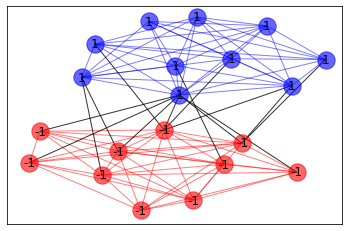

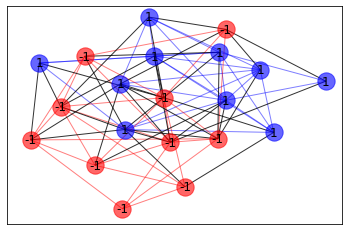

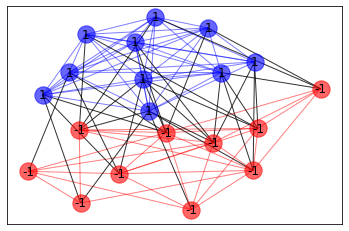

In [98]:
# Some plots

params = [(10, 0.9, 0.9, 0.1), (10, 0.6, 0.6, 0.4), (10, 0.9, 0.5, 0.3)]

for i, p in enumerate(params):
    plt.figure(i)
    plot_graph(*p)
    

#### Graphe de la borne obtenue

On note un effet de seuil dépendant des différentes probabilités iutilisées. On trace ici la courbe de la fonction 
$f(N) = \sum_{k=1}^{\lfloor \frac N2 \rfloor} \binom{N}{k}^2 \exp\left(- 2k(N-k)\lambda^2\right)$.

In [90]:
def proba_borne(N, pa, pb, p):
    l2 = ((pa + pb - 2*p) / 4)**2
    
    return sum((comb(2*N, k, exact=True)**2) * np.exp(-2*k*(2*N-k)*l2) for k in range(1, N+1))

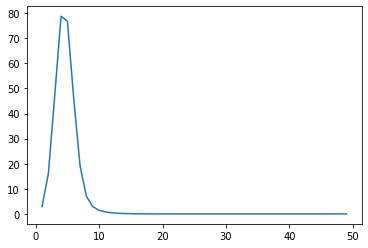

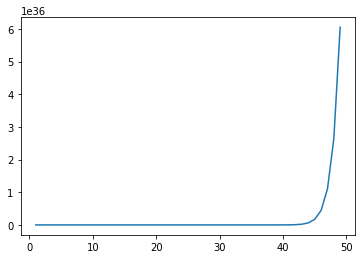

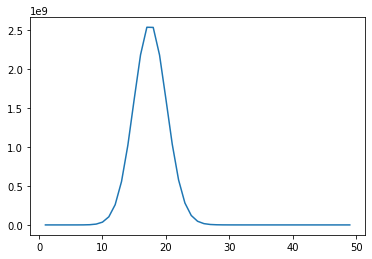

In [99]:
# On trace la borne pour différentes combinaisons de pa,pb,p

for i, (_, pa, pb, p) in enumerate(params):
    X, Y = [], []
    for n in range(1, 50):
        X.append(n)
        Y.append(proba_borne(n, pa, pb, p))
    plt.figure(i)
    plt.clf()
    plt.plot(X, Y)
    plt.show()